In [210]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize, fsolve
from scipy.special import roots_legendre
import scipy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('default')
import copy
# from consts import *
fontsize = 15
def cal_area(r1, r2):
    return np.pi * (r2**2 - r1**2)

r1 = 0.0053
r2 = 0.0063
r3 = 0.0101
r4 = 0.0111
area_in = cal_area(r1, r2)
Jz_in = 100 / area_in
area_out = cal_area(r3, r4)
Jz_out = 100 / area_out
print(Jz_in, Jz_out)
mu0 = 1.257*10**-6# H/m
mu2 = mu4 = 1
mu3 = 10
x_12 = np.linspace(r1, r2, 100)
x_23 = np.linspace(r2, r3, 100)
x_34 = np.linspace(r3, r4, 100)

2744050.7429637127 1501461.7272820305


# B (r1, r2)

4.844502220495115e-05
0.0 3.1755200550240064


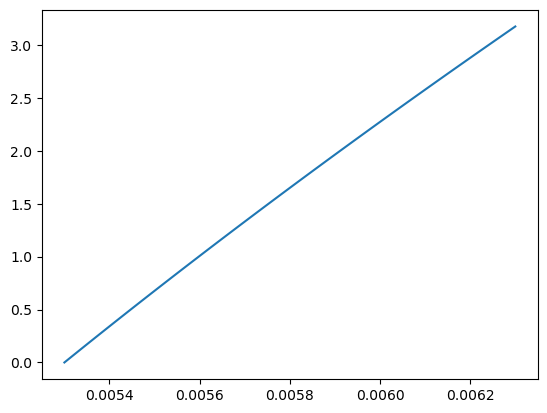

In [211]:
Jz2 = Jz_in
def solve_B02():
    B02_ = 0.5 * mu2 * mu0 *  Jz2 * r1**2
    return(B02_)

B02 = solve_B02()
print(B02)
def B2(r):
    B2_val = -B02/r + 0.5 * mu2 * mu0* Jz_in * r
    return B2_val * 1000

B2_val = B2(x_12)
plt.plot(x_12, B2_val)

print(B2_val[0], B2_val[-1])

# B (r2, r3)

-0.0002000577634665124
31.755200550240065 19.807699353120043


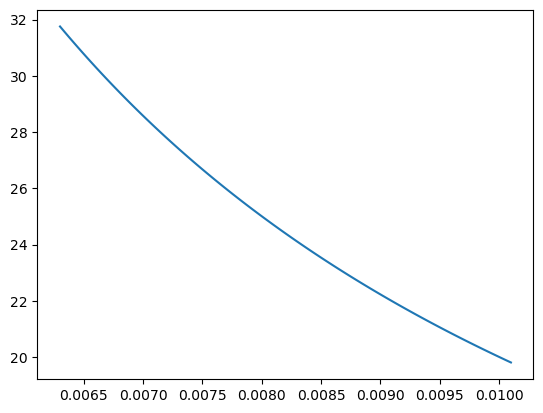

In [212]:
Jz3 = 0
def solve_B03():
    B03_ = -B2_val[-1]/1000 * mu3/mu2 * r2
    return(B03_)

B03 = solve_B03()
print(B03)
def B3(r):
    B3_val = -B03/r 
    return B3_val * 1000

B3_val = B3(x_23)
plt.plot(x_23, B3_val)

print(B3_val[0], B3_val[-1])

# B (r3, r4)

-0.00011626941998447632
1.9807699353120034 0.0


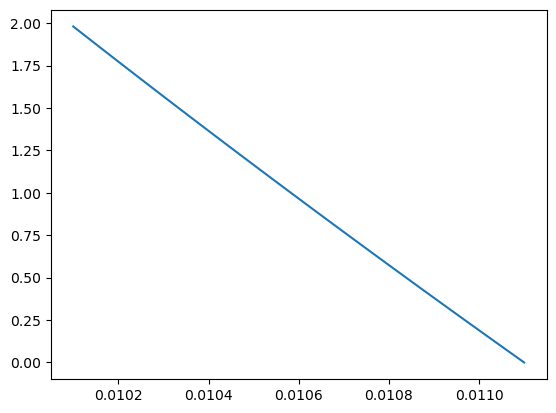

In [213]:
Jz4 = -Jz_out
def solve_B04():
    # at r3
    B04_ = -B3_val[-1]/1000 * mu4/mu3 * r3 + 0.5 * mu4 * mu0 * Jz4 * r3**2
    return(B04_)

B04 = solve_B04()
print(B04)
def B4(r):
    B4_val = -B04/r + 0.5 * mu4 * mu0* Jz4 * r
    return B4_val * 1000

B4_val = B4(x_34)
plt.plot(x_34, B4_val)

print(B4_val[0], B4_val[-1])

# A (r3, r4)

-0.0005814412979955557
0.9740710810437146 4.0657581468206416e-14


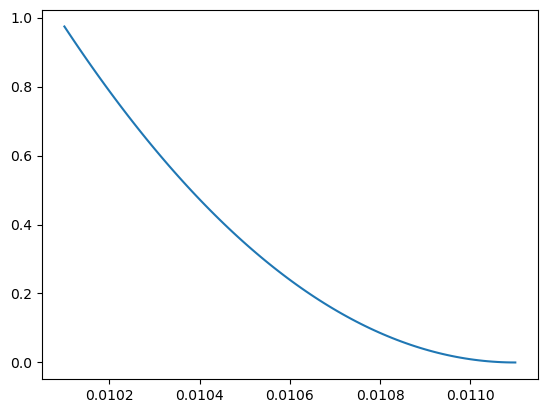

In [214]:
def solve_A04(r):
    A04= -B04* np.log(r) + 1/4 * mu4 * mu0 * Jz4 * r**2 
    return A04
    
A04 = solve_A04(r4)
print(A04)

def A4_func(r):
    A4 = A04 + B04* np.log(r) - 1/4 * mu4 * mu0* Jz4 * r**2
    return A4 * 1e6

A4_val = A4_func(x_34)
plt.plot(x_34, A4_val)    
print(A4_val[0], A4_val[-1])

# A (r2, r3)

0.9740710810437146
A03 -0.0009183353357741602
95.39849270639002 0.9740710810436605


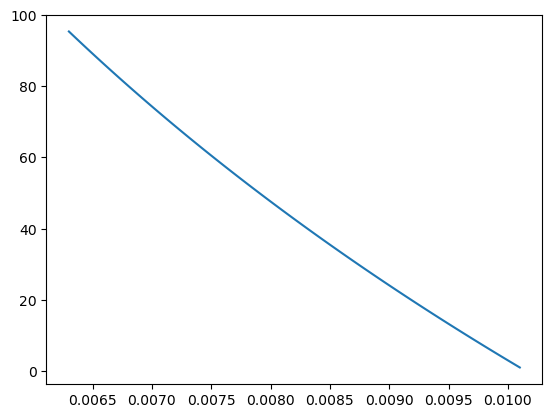

In [215]:

def solve_A03():
    # A3 = 1.740e-6 - B03* np.log(r)
    print(A4_val[0])
    A03 = A4_val[0]/1e6 * 1 - B03* np.log(r3)
    return A03

def A3_func(r):
    A3 = A03 + B03 * np.log(r)
    return A3 * 1e6

A03 = solve_A03()
print("A03", A03)


A3_val = A3_func(x_23)
plt.plot(x_23, A3_val)    
print(A3_val[0], A3_val[-1])


# A (r1, r2)

A02 0.0003751047819995934
97.02800697374416 95.39849270639002


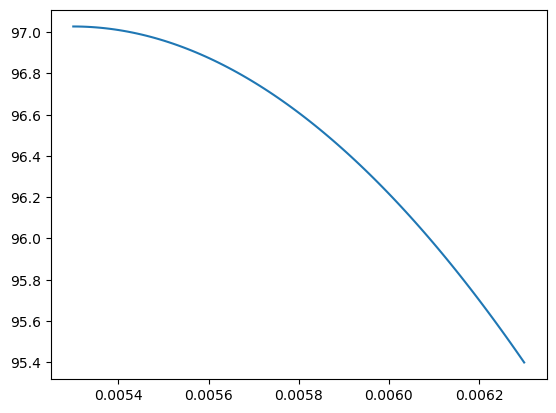

In [216]:


def solve_A02():
    # A3 = 1.740e-6 - B03* np.log(r)
    A2 = A3_val[0]/1e6 - B02* np.log(r2) + 1/4 * mu2 * mu0 * Jz2 * r2**2
    return A2

A02 = solve_A02()
print("A02", A02)


def A2_func(r):
    A2 = A02 + B02* np.log(r) - (1/4) * mu2 * mu0 * Jz2 * r**2
    return A2 * 1e6

A2_val = A2_func(x_12)
A01 = A2_val[0] / 1e6   
plt.plot(x_12, A2_val)    
print(A2_val[0], A2_val[-1])


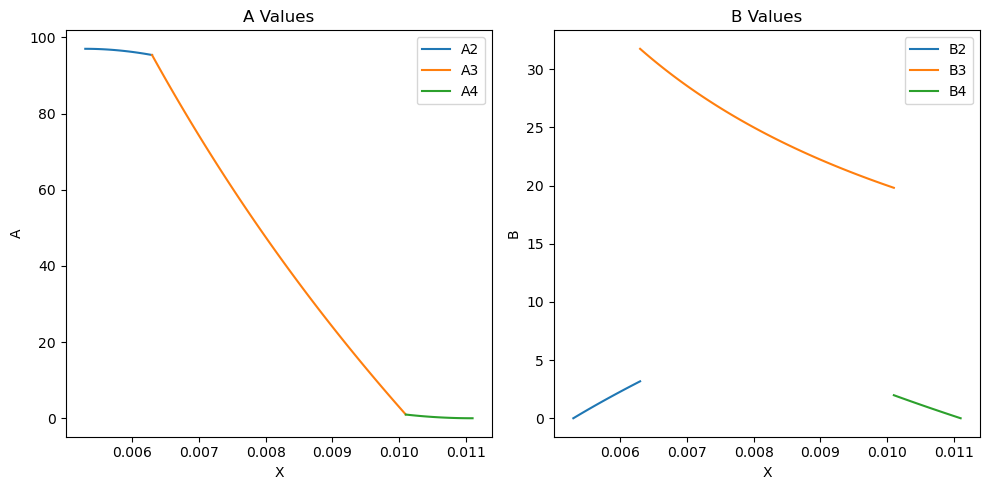

In [217]:


fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

axs[0].plot(x_12, A2_val, label='A2')
axs[0].plot(x_23, A3_val, label='A3')
axs[0].plot(x_34, A4_val, label='A4')
axs[0].set_title('A Values') 
axs[0].set_xlabel('X')  
axs[0].set_ylabel('A') 
axs[0].legend() 

axs[1].plot(x_12, B2_val, label='B2')
axs[1].plot(x_23, B3_val, label='B3')
axs[1].plot(x_34, B4_val, label='B4')
axs[1].set_title('B Values') 
axs[1].set_xlabel('X')  
axs[1].set_ylabel('B')  
axs[1].legend()  

plt.tight_layout() 
plt.show() 


In [221]:

import json

consts = {"r1":0.0053, "r2":0.0063, "r3":0.0101, "r4":0.0111,"Jz_in":Jz_in, "Jz_out":-Jz_out, "Params":[{"A":A01, "B":0, "Jz": 0, "mu":1}, {"A": A02, "B":B02, "Jz":Jz_in, "mu":1 }, {"A":A03, "B":B03, "Jz":0, "mu":mu3}, {"A":A04, "B":B04, "Jz":-Jz_out, "mu":1}] }

with open('consts.json', 'w') as json_file:
    json.dump(consts, json_file, indent=4)

consts
interfaces_global = [0, 0.0053, 0.0063, 0.0101, 0.0111]

In [222]:


def creat_mesh(num_elems_per_segment = 1  ):
    interfaces = interfaces_global
    mesh = np.array([])

    for i in range(len(interfaces)-1):
        start, end = interfaces[i], interfaces[i+1]

        sub_mesh = np.linspace(start, end, num_elems_per_segment + 1)
        if i > 0:
            sub_mesh = sub_mesh[1:]  

        mesh = np.concatenate((mesh, sub_mesh))
        
    mesh_lst = []
    interfaces = interfaces_global

    for i in range(len(interfaces)-1):

        this_mesh = np.linspace(interfaces[i], interfaces[i+1], num_elems_per_segment+1)
        mesh_lst.append((this_mesh))

    return mesh, mesh_lst


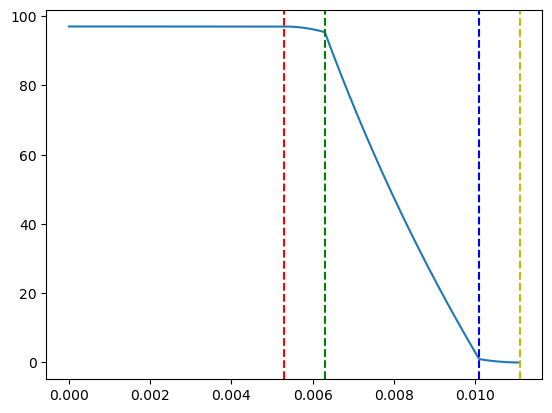

In [227]:
r1 = consts["r1"]
r2 = consts["r2"]
r3 = consts["r3"]
r4 = consts["r4"]
def find_region(value):
    r1 = consts["r1"]
    r2 = consts["r2"]
    r3 = consts["r3"]
    r4 = consts["r4"]

    # 判断值落在哪个区间
    if 0 <= value < r1: 
        return int(0)
    elif r1 <= value < r2:
        return int(1)
    elif r2 <= value < r3:
        return int(2)
    elif r3 <= value <= r4:
        return int(3)
    else:
        raise ValueError("Value {} is less than 0 or larger than r4".format(value))

class exact_fn():
    def __init__(self,):
        self.name = "RHS"
        self.scale = [0, 1]
        self.mu = 1
        self.mu0 = 1.257*10**-6 # H/m
        self.Jz = -1326291.1924324587
        self.B0 = -0.0001302459397568438
        self.A0 = -0.0006358641469510412

    def __call__(self, x):
        x = np.array(x)  
        result = np.zeros_like(x)
        
        for i in range(len(x)):
            x_ = x[i]
            # print(x_)
            region = find_region(x_)
            Param = consts["Params"][region]
            A0 = Param["A"]
            B0 = Param["B"]
            mu = Param["mu"]
            Jz = Param["Jz"]
            muJz = mu * self.mu0 * Jz
            if x_ == 0:
                func1 = A0 - 1/4 * muJz * x_**2 
            else:
                func1 = A0 + B0*np.log(x_) - 1/4 * muJz * x_**2 
            result[i] = func1
        return result * 1e6

exact_func = exact_fn()
# x_data = np.linspace(0, consts["r4"], 5)
mesh_glo, mesh_lst_glo = creat_mesh(num_elems_per_segment = 1000)
y_data = exact_func(mesh_glo)
plt.plot(mesh_glo, y_data)
# 画出竖线
plt.axvline(x=r1, color='r', linestyle='--', label='r1')  # 红色虚线
plt.axvline(x=r2, color='g', linestyle='--', label='r2')  # 绿色虚线
plt.axvline(x=r3, color='b', linestyle='--', label='r3')  # 蓝色虚线
plt.axvline(x=r4, color='y', linestyle='--', label='r4')  # 黄色虚线

y_data[0]

np.savez("/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe_nutils/datasets/Poission.npz", r=mesh_glo, solution=y_data)

# mesh_glo[:1000]
